# 🚀 Pythia8 + ROOT Hands-On Exercise  
### By Oliver Matonoha  

In this Jupyter notebook, we will:  
- Use **Pythia8** to simulate high-energy collisions and generate events for RHIC and LHC energies  
- Analyze specific particles in given decay channels such as **\( J/\psi \to \mu^+ \mu^- \)**.  
- Explore **Multiple Partonic Interactions (MPI)**.    
- Use **ROOT** to visualize results, create histograms, and store data in **ROOT trees** for further analysis.  

📌 **Tip:** You can access the Python interface documentation of Pythia8 using:  
```python
help(pythia8)


First, we load the libraries:

In [1]:
import pythia8
import ROOT

# For interactive canvas, uncomment the following line
#%jsroot on

# Displays the help for the pythia8 module
help(pythia8)

Welcome to JupyROOT 6.28/00
Help on module pythia8:

NAME
    pythia8

DESCRIPTION
    * Documentation through the built-in help function in Python provides
      the relevant mappings between the Python interface and the C++
      code. For documentation on the purpose of the code, see the user
      HTML manual and Doxygen.
    * Templated C++ types are returned as native Python types,
      e.g. vectors are returned as lists, etc. Similarly, native Python
      types can be passed as arguments and are converted to their
      equivalent C++ templates.
    * No difference is made between passing by reference or pointer;
      methods in C++ which take a pointer as an argument in Python simply
      take the object, e.g. foo(Vec4*) and foo(Vec4&) are the same in the
      Python interface.
    * All operators defined in C++, e.g. Vec4*double are available. Note
      that reverse operators are not, e.g. double*Vec4.
    * Classes with defined [] operators are iterable, using standard


### 1. Charged-particle multiplicity at RHIC

This setup initializes **proton-proton (pp) collisions at √s = 13 TeV** using **Pythia8** with **hard QCD processes** enabled. The key steps:

- **Setting up beams & energy:** `Beams:idA = 2212`, `Beams:idB = 2212`, `Beams:eCM = 200`
- **Physics processes:** `HardQCD:all = on` enables hard QCD interactions.
- **Random seed:** `Random:setSeed = on`, `Random:seed = 42` ensures reproducibility.
- Remember to change when simulating actual datasets! `Random:seed = 0` will use a unique seed based on the current time.
- **Initialization:** `pythia.init()` estimates cross-sections and prepares the simulation.

🔗 Full list of configuration settings: [Online Pythia8 Manual](https://pythia.org//latest-manual/Welcome.html)

- **Event generation:** `pythia.next()` produces the next event.
- **Selecting final-state particles:**
  - `particle.isFinal()`: Ensures only final state particles are counted.
  - `particle.isCharged()`: Restricts to charged tracks.
  - `|η| < 0.5`: Focuses on **mid-rapidity**, relevant for LHC central detectors.
- **Final statistics:** `pythia.stat()` prints cross-sections and process details.
- Properties of particles within events are documented at [Particle Class](https://pythia.org/latest-manual/ParticleProperties.html)

This will produce **ROOT histograms** of:
1. **Charged particle multiplicity at mid-rapidity.**
2. **pThat (hard scattering scale) distribution.**



Simulation complete. ROOT file 'pp_multiplicity_pthat.root' saved with histograms.

 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.312      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 23 May 2024  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 01 Feb 2025 at 01:27:21    |  | 
 |  |                    

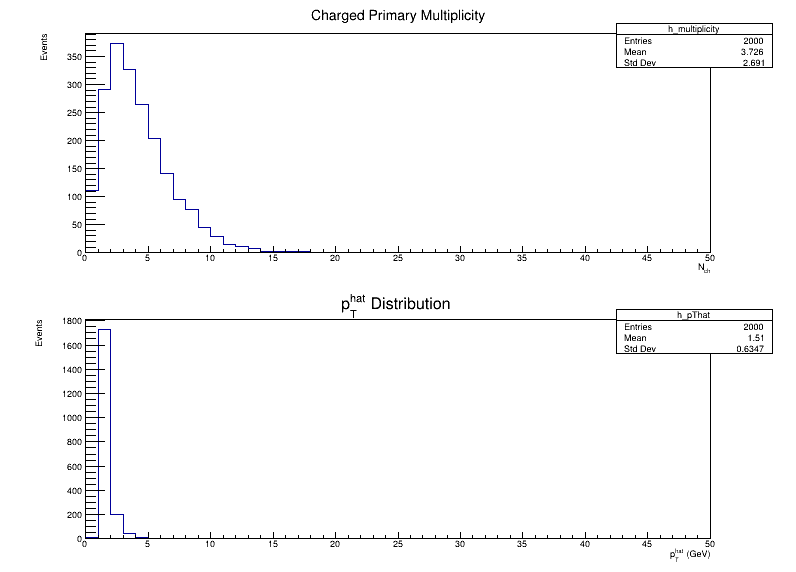

In [2]:
# Initialize Pythia
pythia = pythia8.Pythia()

# Set up LHC proton-proton collisions at 13 TeV
pythia.readString("Beams:idA = 2212")  # Proton
pythia.readString("Beams:idB = 2212")  # Proton
pythia.readString("Beams:eCM = 200.")  # Collision energy in GeV

# Enable QCD hard processes
pythia.readString("HardQCD:all = on")

# Limit the phase-space
# pythia.readString("PhaseSpace:pTHatMin = 10.")  # Minimum pT hard

# Enable parton showers and hadronization
pythia.readString("PartonLevel:MPI = on")   # Multiple Parton Interactions
pythia.readString("PartonLevel:ISR = on")   # Initial State Radiation
pythia.readString("PartonLevel:FSR = on")   # Final State Radiation

pythia.readString("HadronLevel:Decay = on")  # Enable hadron decays

# Initialize Pythia
pythia.init()

# ROOT histogram setup
canvas = ROOT.TCanvas("c1", "Multiplicity and pThat", 800, 600)

# Create histograms
h_multiplicity = ROOT.TH1F("h_multiplicity", "Charged Primary Multiplicity;N_{ch};Events", 50, 0, 50)
h_pThat = ROOT.TH1F("h_pThat", "p_{T}^{hat} Distribution;p_{T}^{hat} (GeV);Events", 50, 0, 50)

# Event loop
nEvents = 2000
for iEvent in range(nEvents):
    if not pythia.next():
        continue
    
    # Get pThat of the event (hard scale of the interaction)
    pThat = pythia.infoPython().pTHat()
    h_pThat.Fill(pThat)
    
    # Count charged primary final-state particles
    nCharged = 0
    for i in range(pythia.event.size()):

        # Get individual particle
        p = pythia.event[i]
        if p.isFinal() and p.isCharged() and abs(p.eta()) < 0.5:
            nCharged += 1
    
    h_multiplicity.Fill(nCharged)

# Draw histograms
canvas.Divide(1, 2)
canvas.cd(1)
h_multiplicity.Draw()
canvas.cd(2)
h_pThat.Draw()
canvas.Draw()

# Save histograms to ROOT file
output_file = ROOT.TFile("pp_multiplicity_pthat.root", "RECREATE")
h_multiplicity.Write()
h_pThat.Write()
output_file.Close()

# Print final statistics
pythia.stat()

print("\nSimulation complete. ROOT file 'pp_multiplicity_pthat.root' saved with histograms.")


The simulation successfully generated **2000 pp collision events** at **200 GeV**. Key takeaways:

#### **ROOT Histograms**
1. **Charged Particle Multiplicity (`|η| < 0.5`)**
    - The most typical event activity observable.

2. **pThat Distribution (Hard Scattering Scale)**
   - Represents the **transverse momentum of the hardest partonic interaction**.
   - Higher pThat values correspond to **harder scatterings** (e.g., jet events).

#### **Pythia Event Summary**
- **Process contributions:** Lists subprocesses like **gg → gg, qq → qq’**, with their estimated cross-sections.
- **Final statistics:** Confirms event generation success.
- **Warnings/Errors:**
  - Some fragmentation errors due to hadronization failures (doesn't affect the result).
  - Momentum conservation warnings (minor numerical effects).

#### **Play with it**
- **Filter by transverse momentum** (`pT > 0.15 GeV`) to be more realistic.
- What happens when we limit the phase space for pTHat?



### 2. Studying Multiplicity and MPI in events at 7 TeV

Now, we simulate **Non-Single Diffractive (NSD) events** at the **LHC energy of 7 TeV**.  
Key updates in this setup:
- **SoftQCD:nonDiffractive = on** → Selects NSD events instead of hard QCD interactions.
- **MultipartonInteractions:pT0Ref = 3.0** → Controls the minimum **pT scale** for MPI.

We will look at:
2. **Number of Multiple Parton Interactions (MPI)** per event.
3. **Correlation between multiplicity and MPI** (2D histogram).
4. **Comparison with experimental data** from **CMS** (https://www.hepdata.net/record/57914)

The multiplicity histogram is **normalized** for direct data comparison.  
A **log-scale y-axis** is applied to better visualize distribution tails.



Simulation complete. ROOT file 'lhc_mpi_analysis.root' saved with histograms.

 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.312      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 23 May 2024  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 01 Feb 2025 at 01:27:45    |  | 
 |  |                         

Warning in <TROOT::Append>: Replacing existing TH1: h_multiplicity (Potential memory leak).


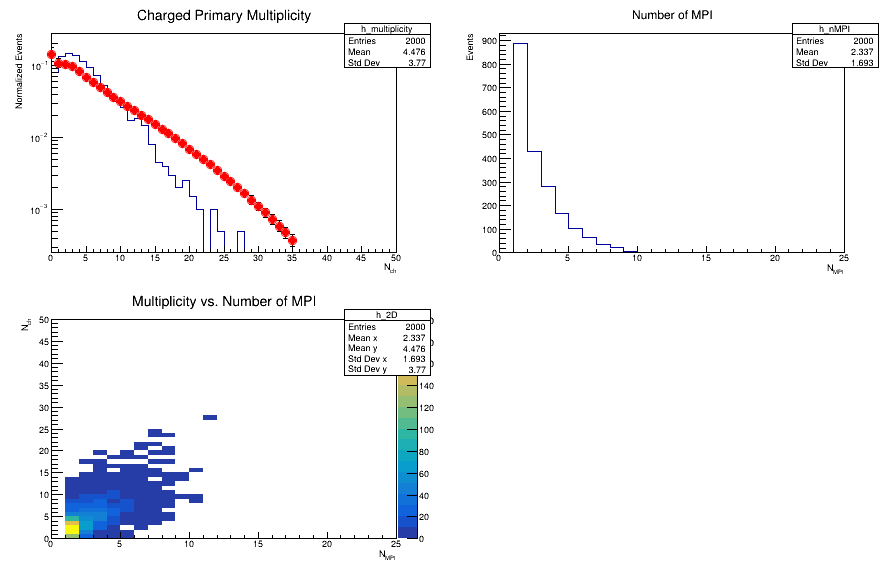

In [3]:
# Initialize Pythia
pythia = pythia8.Pythia()

# Set up LHC proton-proton collisions at 7 TeV
pythia.readString("Beams:idA = 2212")  # Proton
pythia.readString("Beams:idB = 2212")  # Proton
pythia.readString("Beams:eCM = 7000.")  # Collision energy in GeV

# Enable SoftQCD Non-Single Diffractive (NSD) events
pythia.readString("SoftQCD:nonDiffractive = on")

# Minimum pT for multiple parton interactions (user can modify)
pythia.readString("MultipartonInteractions:pT0Ref = 3.0")

# Enable MPI, ISR, FSR
pythia.readString("PartonLevel:MPI = on")
pythia.readString("PartonLevel:ISR = on")
pythia.readString("PartonLevel:FSR = on")

# Enable hadron decays
pythia.readString("HadronLevel:Decay = on")

# Initialize Pythia
pythia.init()

# ROOT histogram setup
canvas = ROOT.TCanvas("c2", "Multiplicity, n_MPI, and 2D Histogram", 900, 600)

# Create histograms
h_multiplicity = ROOT.TH1F("h_multiplicity", "Charged Primary Multiplicity;N_{ch};Normalized Events", 50, 0, 50)
h_nMPI = ROOT.TH1F("h_nMPI", "Number of MPI;N_{MPI};Events", 25, 0, 25)
h_2D = ROOT.TH2F("h_2D", "Multiplicity vs. Number of MPI;N_{MPI};N_{ch}", 25, 0, 25, 50, 0, 50)

# Event loop
nEvents = 2000
for iEvent in range(nEvents):
    if not pythia.next():
        continue
    
    # Get number of multiple parton interactions (MPI)
    nMPI = pythia.infoPython().nMPI()
    h_nMPI.Fill(nMPI)
    
    # Count charged primary final-state particles
    nCharged = 0
    for i in range(pythia.event.size()):
        p = pythia.event[i]
        if p.isFinal() and p.isCharged() and abs(p.eta()) < 0.5 and p.pT() > 0.15:
            nCharged += 1
    
    h_multiplicity.Fill(nCharged)
    h_2D.Fill(nMPI, nCharged)

# Normalize multiplicity histogram
h_multiplicity.Scale(1.0 / nEvents)

# Load experimental data from ROOT file
exp_file = ROOT.TFile("HEPData-ins879315-v1-Table_12.root")
data_dir = exp_file.Get("Table 12")
graph_exp = data_dir.Get("Graph1D_y1")

# Draw histograms
canvas.Divide(2, 2)
canvas.cd(1)
canvas.GetPad(1).SetLogy()  # Set log scale for y-axis
h_multiplicity.Draw("HIST")
graph_exp.SetMarkerStyle(20)
graph_exp.SetMarkerColor(ROOT.kRed)
graph_exp.Draw("P SAME")

canvas.cd(2)
h_nMPI.Draw()
canvas.cd(3)
h_2D.Draw("COLZ")
canvas.Draw()

# Save histograms to ROOT file
output_file = ROOT.TFile("lhc_mpi_analysis.root", "RECREATE")
h_multiplicity.Write()
h_nMPI.Write()
h_2D.Write()
output_file.Close()

# Print final statistics
pythia.stat()

print("\nSimulation complete. ROOT file 'lhc_mpi_analysis.root' saved with histograms.")


Now we simulated **2000 pp collision events** at **7 TeV**. Key takeaways:

1. **Comparison of `N_ch` and data**
   - Shows that something needs to be tuned!

2. **Number of MPI (`N_MPI`)**
   - Number of **multiple parton interactions** per event.

3. **Multiplicity vs. MPI (2D Histogram)**
   - Shows **correlation between `N_ch` and `N_MPI`**.
   - Higher MPI is the dominant source of higher multiplicity

#### **Play with it**
- What happens to `N_ch` and `N_MPI` as we change the MPI minimum pT parameter pT0Ref?
- What value of pT0Ref is optimal to reproduce the CMS data?

### 3. J/ψ Production and Decay in pp Collisions

In this exercise, we simulate **J/ψ production** in **proton-proton collisions at 7 TeV** and store key event and particle information in a structured **ROOT tree**.

#### **What we do**
- **Accessing PDG IDs**:  
  - We identify the **J/ψ** using its **PDG ID = 443**.
  - Muons are selected by comparing their **PDG ID = 13**.
  - Decay modes of the particles can be turned on/off. We select only the di-muon channel `443:onIfMatch = 13 -13`

- **Tracking Parent-Daughter Relationships**:
  - Each **muon’s mother index** is stored (`mu_motherID`).
  - The **PDG ID of the mother** is also store (`mu_motherPDG`).

- **Tree Structure**:
  - **Global Event information**: `nMPI` and `nCh`
  - **J/ψ Information**: `pT`, `y`, `φ`, and **its index in the event** (`jpsi_id`).
  - **Muon Information**: `pT`, `η`, `φ`, **charge**, **mother index**, and **mother PDG ID**.


In [ ]:
# Initialize Pythia
pythia = pythia8.Pythia()

# Set up LHC proton-proton collisions at 7 TeV
pythia.readString("Beams:idA = 2212")  # Proton
pythia.readString("Beams:idB = 2212")  # Proton
pythia.readString("Beams:eCM = 7000.")  # Collision energy in GeV

# Enable J/psi production
pythia.readString("Charmonium:all = on")

# Ensure J/Psi is decaying only into dimuons
pythia.readString("443:onMode = off")       # Turn off all J/Psi decays
pythia.readString("443:onIfMatch = 13 -13") # Enable only J/Psi -> mu+ mu-


# Enable MPI, ISR, FSR
pythia.readString("PartonLevel:MPI = on")
pythia.readString("PartonLevel:ISR = on")
pythia.readString("PartonLevel:FSR = on")

# Enable hadron decays
pythia.readString("HadronLevel:Decay = on")

# Initialize Pythia
pythia.init()

# Create a ROOT file and tree
output_file = ROOT.TFile("jpsi_production.root", "RECREATE")
tree = ROOT.TTree("T", "J/psi Production Data")

# Define event-level variables
nMPI = ROOT.std.vector('int')(1)
nCh = ROOT.std.vector('int')(1)

# Define J/psi mother variables
jpsi_pT = ROOT.std.vector('float')()
jpsi_y = ROOT.std.vector('float')()
jpsi_phi = ROOT.std.vector('float')()
jpsi_id = ROOT.std.vector('int')()

# Define muon daughter variables
mu_pT = ROOT.std.vector('float')()
mu_eta = ROOT.std.vector('float')()
mu_phi = ROOT.std.vector('float')()
mu_charge = ROOT.std.vector('int')()
mu_motherID = ROOT.std.vector('int')()
mu_motherPDG = ROOT.std.vector('int')()

# Attach branches to the tree
tree.Branch("nMPI", nMPI)
tree.Branch("nCh", nCh)
tree.Branch("jpsi_pT", jpsi_pT)
tree.Branch("jpsi_y", jpsi_y)
tree.Branch("jpsi_phi", jpsi_phi)
tree.Branch("jpsi_id", jpsi_id)
tree.Branch("mu_pT", mu_pT)
tree.Branch("mu_eta", mu_eta)
tree.Branch("mu_phi", mu_phi)
tree.Branch("mu_charge", mu_charge)
tree.Branch("mu_motherID", mu_motherID)
tree.Branch("mu_motherPDG", mu_motherPDG)

# Event loop
nEvents = 5000
for iEvent in range(nEvents):
    if not pythia.next():
        continue
    
    # Clear vectors for new event
    nMPI[0] = pythia.infoPython().nMPI()
    
    nCharged = 0
    for i in range(pythia.event.size()):
        p = pythia.event[i]
        if p.isFinal() and p.isCharged() and abs(p.eta()) < 2.5 and p.pT() > 0.15:
            nCharged += 1
    nCh[0] = nCharged
    
    jpsi_pT.clear()
    jpsi_y.clear()
    jpsi_phi.clear()
    jpsi_id.clear()
    mu_pT.clear()
    mu_eta.clear()
    mu_phi.clear()
    mu_charge.clear()
    mu_motherID.clear()
    mu_motherPDG.clear()
    
    # Loop over particles to find J/psi and its decay products
    for i in range(pythia.event.size()):
        p = pythia.event[i]
        
        if abs(p.id()) == 443:  # J/psi identification
            jpsi_pT.push_back(p.pT())
            jpsi_y.push_back(p.y())
            jpsi_phi.push_back(p.phi())
            jpsi_id.push_back(i)
        
        # Find muon daughters of J/psi
        if abs(p.id()) == 13 and p.isFinal():  # Muon or anti-muon
            mu_pT.push_back(p.pT())
            mu_eta.push_back(p.eta())
            mu_phi.push_back(p.phi())
            mu_charge.push_back(int(p.id() / abs(p.id())))  # +1 for mu+, -1 for mu-
            mu_motherID.push_back(p.mother1())
            mu_motherPDG.push_back(pythia.event[p.mother1()].id())
    
    tree.Fill()

# Save tree and close file
output_file.Write()
output_file.Close()

# Print final statistics
pythia.stat()

print("\nSimulation complete. ROOT file 'jpsi_production.root' saved with J/psi data.")



Simulation complete. ROOT file 'jpsi_production.root' saved with J/psi data.

 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.312      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 23 May 2024  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 01 Feb 2025 at 01:28:11    |  | 
 |  |                          